In [1]:
import oot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%load_ext autoreload
%autoreload 2

In [29]:
planet=oot.planet()
planet.M=1 #sun-like star
planet.R=1
planet.Mp=0.001 #jupiter-like planet
planet.Rp=0.1
planet.a=20 #mercury like eccentricity, at a quarter of the distance
planet.e=0.2
planet.vTheta=np.pi/2 #viewed from an oblique angle
planet.vPhi=np.pi/4

period=oot.findPeriod(planet)
ts=np.linspace(-period/2,period/2,200)

/Users/Zephyr/Google Drive/astro/pythonModules/OoT/oot.py:141: RuntimeWarning: invalid value encountered in arccos
  d[total]=pl.R #this should stop an annoying warning message
/Users/Zephyr/Google Drive/astro/pythonModules/OoT/oot.py:142: RuntimeWarning: invalid value encountered in arccos
  firstTerm=((rUnit*pl.Rp)**2)*np.arccos((d**2 + (rUnit*pl.Rp)**2 - pl.R**2)/(2*d*(rUnit*pl.Rp)))
/Users/Zephyr/Google Drive/astro/pythonModules/OoT/oot.py:143: RuntimeWarning: invalid value encountered in sqrt
  secondTerm=(pl.R**2)*np.arccos((d**2 + pl.R**2 - (rUnit*pl.Rp)**2)/(2*d*pl.R))


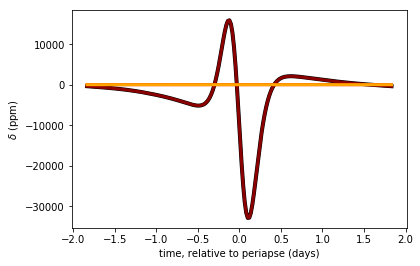

In [43]:
delta=oot.deltaSum(ts,planet)
tides=oot.deltaTide(ts,planet)
beaming=oot.deltaBeam(ts,planet)
reflections=oot.deltaReflect(ts,planet)

deltaPlot=plt.gca()
deltaPlot.plot(ts,1e6*delta,c='k',lw=4)
deltaPlot.plot(ts,1e6*tides,c='darkred',lw=3)
deltaPlot.plot(ts,1e6*beaming,c='red',lw=3)
deltaPlot.plot(ts,1e6*reflections,c='orange',lw=3)
deltaPlot.set_xlabel('time, relative to periapse (days)')
deltaPlot.set_ylabel(r'$\delta$ (ppm)')
plt.show()
#plt.savefig('examplePlot.png')

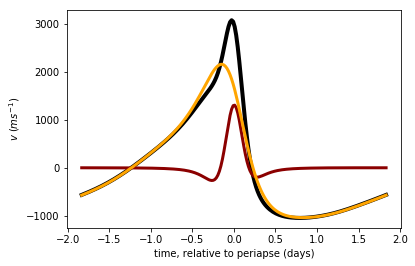

In [42]:
# We'll need quite a different planet/star to make the todal velocity visible
planet=oot.planet()
planet.M=1 #giant star
planet.R=4
planet.Mp=0.01 #Supiter
planet.Rp=0.1
planet.a=10 #close eccentric orbit
planet.e=0.5
planet.vTheta=np.pi/2 #viewed from an oblique angle
planet.vPhi=np.pi/4

period=oot.findPeriod(planet)
ts=np.linspace(-period/2,period/2,200)

velocity=oot.vSum(ts,planet)
vTide=oot.vTide(ts,planet)
vOrbit=oot.vOrbit(ts,planet)

vPlot=plt.gca()
vPlot.plot(ts,velocity,c='k',lw=4)
vPlot.plot(ts,vTide,c='darkred',lw=3)
vPlot.plot(ts,vOrbit,c='orange',lw=3)
vPlot.set_xlabel('time, relative to periapse (days)')
vPlot.set_ylabel(r'$v$ ($ms^{-1}$)')
plt.show()